In [1]:
import numpy as np
import IPython
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [2]:
BASE_PERIOD = 200
SAWTOOTH = np.array([i / BASE_PERIOD for i in range(BASE_PERIOD)]) - 0.5
SQUARE = np.zeros(32)
SQUARE[0:16] += 1
SQUARE -= 0.5
WONKY = np.array([np.random.random() for i in range(BASE_PERIOD)])
BASE_WAVE = SAWTOOTH

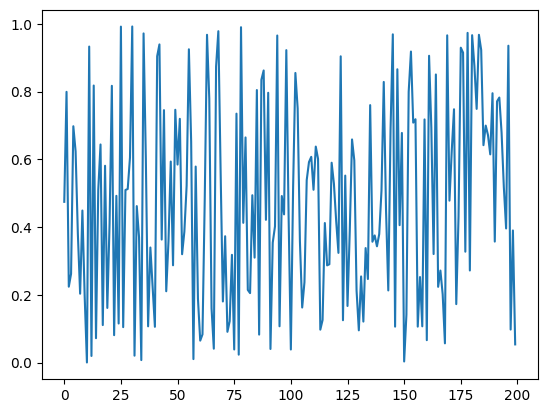

In [3]:
plt.plot(WONKY)

In [4]:
transform = np.fft.fft(BASE_WAVE)
NUM_LINES = BASE_PERIOD // 2 + 1
print(transform)
transform = transform[:NUM_LINES]
mags = abs(transform)
phases = np.angle(transform)
freq_scalars = np.array([i for i in range(NUM_LINES)])
mags[1:-1] *= 2
mags /= BASE_PERIOD

[-0.5+0.00000000e+00j -0.5+3.18283706e+01j -0.5+1.59102580e+01j
 -0.5+1.06024744e+01j -0.5+7.94727242e+00j -0.5+6.35310237e+00j
 -0.5+5.28944750e+00j -0.5+4.52894334e+00j -0.5+3.95790754e+00j
 -0.5+3.51318311e+00j -0.5+3.15687576e+00j -0.5+2.86487082e+00j
 -0.5+2.62109179e+00j -0.5+2.41440868e+00j -0.5+2.23687141e+00j
 -0.5+2.08264989e+00j -0.5+1.94737143e+00j -0.5+1.82769218e+00j
 -0.5+1.72101129e+00j -0.5+1.62527540e+00j -0.5+1.53884177e+00j
 -0.5+1.46038049e+00j -0.5+1.38880343e+00j -0.5+1.32321161e+00j
 -0.5+1.26285584e+00j -0.5+1.20710678e+00j -0.5+1.15543183e+00j
 -0.5+1.10737725e+00j -0.5+1.06255409e+00j -0.5+1.02062698e+00j
 -0.5+9.81305253e-01j -0.5+9.44335671e-01j -0.5+9.09496624e-01j
 -0.5+8.76593316e-01j -0.5+8.45453828e-01j -0.5+8.15925844e-01j
 -0.5+7.87873930e-01j -0.5+7.61177253e-01j -0.5+7.35727658e-01j
 -0.5+7.11428039e-01j -0.5+6.88190960e-01j -0.5+6.65937476e-01j
 -0.5+6.44596116e-01j -0.5+6.24102018e-01j -0.5+6.04396175e-01j
 -0.5+5.85424783e-01j -0.5+5.67138675e-0

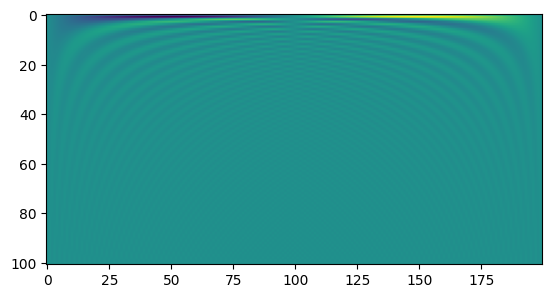

In [5]:
a = np.tile(np.arange(BASE_PERIOD) * 2 * np.pi / BASE_PERIOD, NUM_LINES)
a = np.reshape(a, (NUM_LINES, BASE_PERIOD))
for i in range(NUM_LINES):
    a[i] = (mags[i] * np.cos((freq_scalars[i] * a[i]) + phases[i]) )# + (mags[i] * np.cos((len(transform) - i * a[i]) + phases[i]) / len(transform))
plt.imshow(a)

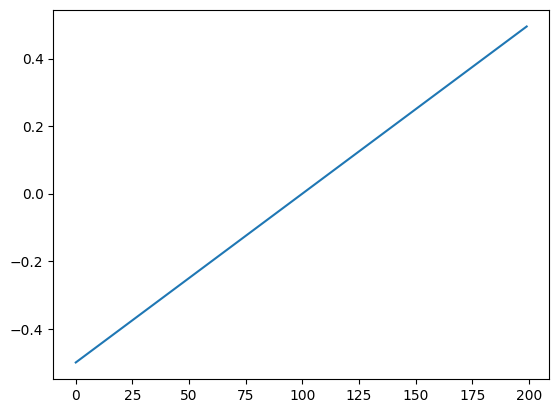

In [6]:
plt.plot(np.sum(a, axis=0))

In [7]:
FS = 44100

In [8]:
def oscillator(amp, freq, phase, num_samples):
    samples = np.arange(num_samples) / FS
    return amp * np.cos(freq * 2 * np.pi * samples + phase)

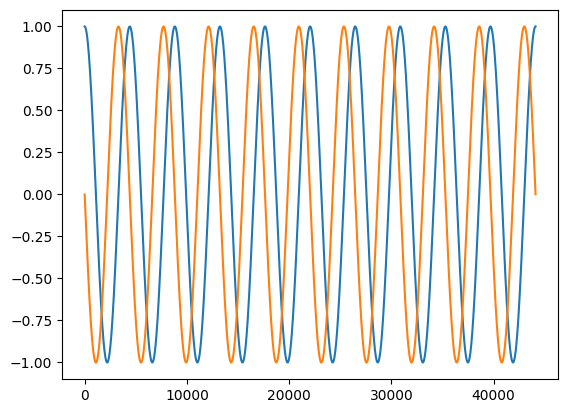

In [9]:
plt.plot(oscillator(1, 10, 0, 44100))
plt.plot(oscillator(1, 10, np.pi / 2, 44100))

In [10]:
def construct_wave(num_samples, frequency, mags, phases):
    result = np.zeros(num_samples)
    for i in range(len(mags)):
        overtone_freq = i * frequency
        if overtone_freq < FS * 0.45:
            result += oscillator(mags[i], overtone_freq, phases[i], num_samples)
    return result

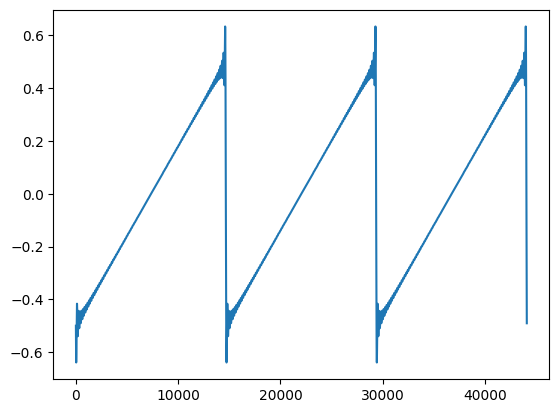

In [11]:
plt.plot(construct_wave(44100, 3, mags, phases))

In [12]:
test_freqs = [20, 100, 400, 800, 1600, 4000, 8000, 15000]
for f in test_freqs:
    print(f)
    w = construct_wave(44100 * 2, f, mags, phases)
    wavfile.write(f'crazy{f}.wav', FS, w)

20
100
400
800
1600
4000
8000
15000


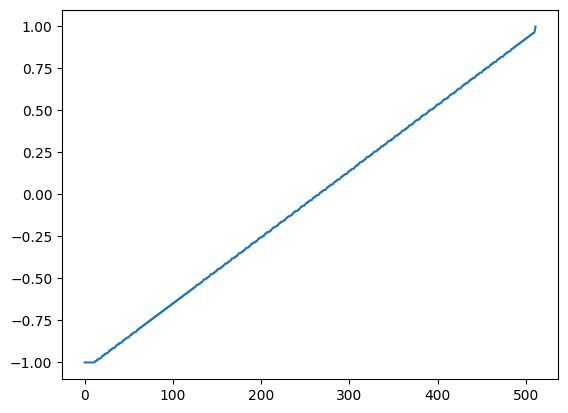

In [13]:
a = "-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -0.992157 -0.992157 -0.984314 -0.984314 -0.976471 -0.976471 -0.976471 -0.968627 -0.960784 -0.960784 -0.952941 -0.952941 -0.945098 -0.945098 -0.945098 -0.937255 -0.929412 -0.929412 -0.921569 -0.921569 -0.913725 -0.913725 -0.913725 -0.905882 -0.898039 -0.898039 -0.890196 -0.890196 -0.882353 -0.882353 -0.882353 -0.87451 -0.866667 -0.866667 -0.858824 -0.858824 -0.85098 -0.85098 -0.85098 -0.843137 -0.835294 -0.835294 -0.827451 -0.827451 -0.819608 -0.819608 -0.819608 -0.811765 -0.803922 -0.803922 -0.796078 -0.796078 -0.788235 -0.788235 -0.780392 -0.780392 -0.772549 -0.772549 -0.764706 -0.764706 -0.756863 -0.756863 -0.74902 -0.74902 -0.741176 -0.741176 -0.733333 -0.733333 -0.72549 -0.72549 -0.717647 -0.717647 -0.709804 -0.709804 -0.701961 -0.701961 -0.694118 -0.694118 -0.686275 -0.686275 -0.678431 -0.678431 -0.670588 -0.670588 -0.662745 -0.662745 -0.654902 -0.654902 -0.647059 -0.647059 -0.639216 -0.639216 -0.631373 -0.631373 -0.623529 -0.623529 -0.615686 -0.615686 -0.607843 -0.607843 -0.6 -0.6 -0.592157 -0.592157 -0.584314 -0.584314 -0.576471 -0.576471 -0.568627 -0.568627 -0.560784 -0.560784 -0.552941 -0.552941 -0.545098 -0.537255 -0.537255 -0.537255 -0.529412 -0.529412 -0.521569 -0.521569 -0.513725 -0.505882 -0.505882 -0.505882 -0.498039 -0.498039 -0.490196 -0.490196 -0.482353 -0.47451 -0.47451 -0.47451 -0.466667 -0.466667 -0.458824 -0.458824 -0.45098 -0.443137 -0.443137 -0.443137 -0.435294 -0.435294 -0.427451 -0.427451 -0.419608 -0.411765 -0.411765 -0.411765 -0.403922 -0.403922 -0.396078 -0.396078 -0.388235 -0.380392 -0.380392 -0.380392 -0.372549 -0.372549 -0.364706 -0.364706 -0.356863 -0.34902 -0.34902 -0.34902 -0.341176 -0.341176 -0.333333 -0.333333 -0.32549 -0.317647 -0.317647 -0.317647 -0.309804 -0.309804 -0.301961 -0.294118 -0.294118 -0.286274 -0.286274 -0.286274 -0.278431 -0.278431 -0.270588 -0.262745 -0.262745 -0.254902 -0.254902 -0.254902 -0.247059 -0.247059 -0.239216 -0.231373 -0.231373 -0.223529 -0.223529 -0.223529 -0.215686 -0.215686 -0.207843 -0.2 -0.2 -0.192157 -0.192157 -0.192157 -0.184314 -0.184314 -0.176471 -0.168627 -0.168627 -0.160784 -0.160784 -0.160784 -0.152941 -0.152941 -0.145098 -0.137255 -0.137255 -0.129412 -0.129412 -0.129412 -0.121569 -0.121569 -0.113725 -0.105882 -0.105882 -0.0980393 -0.0980393 -0.0980393 -0.0901961 -0.0901961 -0.0823529 -0.0745098 -0.0745098 -0.0666667 -0.0666667 -0.0666667 -0.0588235 -0.0509804 -0.0509804 -0.0431373 -0.0431373 -0.0352941 -0.0352941 -0.0352941 -0.0274509 -0.0196079 -0.0196079 -0.0117647 -0.0117647 -0.00392157 -0.00392157 -0.00392157 0.00392163 0.0117648 0.0117648 0.0196079 0.0196079 0.027451 0.027451 0.027451 0.0352942 0.0431373 0.0431373 0.0509804 0.0509804 0.0588236 0.0588236 0.0588236 0.0666667 0.0745099 0.0745099 0.082353 0.082353 0.0901961 0.0901961 0.0901961 0.0980393 0.105882 0.105882 0.113726 0.113726 0.121569 0.121569 0.121569 0.129412 0.137255 0.137255 0.145098 0.145098 0.152941 0.152941 0.152941 0.160784 0.168628 0.168628 0.176471 0.176471 0.184314 0.192157 0.192157 0.192157 0.2 0.2 0.207843 0.207843 0.215686 0.223529 0.223529 0.223529 0.231373 0.231373 0.239216 0.239216 0.247059 0.254902 0.254902 0.254902 0.262745 0.262745 0.270588 0.270588 0.278431 0.286275 0.286275 0.286275 0.294118 0.294118 0.301961 0.301961 0.309804 0.317647 0.317647 0.317647 0.32549 0.32549 0.333333 0.333333 0.341177 0.34902 0.34902 0.34902 0.356863 0.356863 0.364706 0.364706 0.372549 0.380392 0.380392 0.380392 0.388235 0.388235 0.396078 0.396078 0.403922 0.411765 0.411765 0.411765 0.419608 0.419608 0.427451 0.435294 0.435294 0.443137 0.443137 0.443137 0.45098 0.45098 0.458824 0.466667 0.466667 0.47451 0.47451 0.47451 0.482353 0.482353 0.490196 0.498039 0.498039 0.505882 0.505882 0.505882 0.513725 0.513725 0.521569 0.529412 0.529412 0.537255 0.537255 0.537255 0.545098 0.545098 0.552941 0.560784 0.560784 0.568627 0.568627 0.568627 0.576471 0.576471 0.584314 0.592157 0.592157 0.6 0.6 0.6 0.607843 0.607843 0.615686 0.623529 0.623529 0.631372 0.631372 0.631372 0.639216 0.647059 0.647059 0.654902 0.654902 0.662745 0.662745 0.662745 0.670588 0.678431 0.678431 0.686275 0.686275 0.694118 0.694118 0.694118 0.701961 0.709804 0.709804 0.717647 0.717647 0.72549 0.72549 0.72549 0.733333 0.741176 0.741176 0.74902 0.74902 0.756863 0.756863 0.756863 0.764706 0.772549 0.772549 0.780392 0.780392 0.788235 0.788235 0.788235 0.796078 0.803921 0.803921 0.811765 0.811765 0.819608 0.819608 0.819608 0.827451 0.835294 0.835294 0.843137 0.843137 0.85098 0.85098 0.85098 0.858824 0.866667 0.866667 0.87451 0.87451 0.882353 0.882353 0.890196 0.890196 0.898039 0.898039 0.905882 0.905882 0.913725 0.913725 0.921569 0.921569 0.929412 0.929412 0.937255 0.937255 0.945098 0.945098 0.952941 0.952941 0.960784 0.960784 0.968627 1"
plt.plot([float(i) for i in a.split()])